### **Mount drive**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd {'/content/drive/MyDrive/Kaggle'}

/content/drive/MyDrive/Kaggle


### **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model, svm, datasets, neighbors, tree, naive_bayes
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV, LeaveOneOut
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score


# **Load data created in previous notebook**

In [ ]:
import os
import pickle
with open('Datasets/data_encoded.pickle', 'rb') as file:
    dict_prepared = pickle.load(file)

In [ ]:
X_train = dict_prepared['X_train']
X_test = dict_prepared['X_test']
y_train = dict_prepared['y_train']
y_test = dict_prepared['y_test']

# **Feature Scaling**

In [ ]:
col_names = X_train.columns

## **MinMaxScaler**

In [ ]:
scaler1 = MinMaxScaler()
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()
#fit train and test
X_train_minmax = scaler1.fit_transform(X_train_minmax)
X_test_minmax = scaler1.fit_transform(X_test_minmax)
#restore
X_train_minmax = pd.DataFrame(X_train_minmax, columns=col_names)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=col_names)

In [36]:
dict_prepared_minmax = {"X_train": X_train_minmax, "X_test": X_test_minmax,
                "y_train": y_train, "y_test": y_test}

In [37]:
with open('Datasets/data_encoded_minmax.pickle', 'wb') as file:
  pickle.dump(dict_prepared_minmax, file)

## **StandardScaler**

In [ ]:
scaler2 = StandardScaler()
X_train_std = X_train.copy()
X_test_std = X_test.copy()
#fit train and test
X_train_std = scaler1.fit_transform(X_train_std)
X_test_std = scaler1.fit_transform(X_test_std)
#restore
X_train_std = pd.DataFrame(X_train_std, columns=col_names)
X_test_std = pd.DataFrame(X_test_std, columns=col_names)

In [38]:
dict_prepared_std = {"X_train": X_train_std, "X_test": X_test_std,
                "y_train": y_train, "y_test": y_test}

In [39]:
with open('Datasets/data_encoded_std.pickle', 'wb') as file:
  pickle.dump(dict_prepared_std, file)

# **Training models**

In [ ]:
# ignore basic warnings
import warnings

warnings.filterwarnings('ignore')

In [ ]:
original = [X_train, X_test, y_train, y_test]
min_max = [X_train_minmax, X_test_minmax, y_train, y_test]
std = [X_train_std, X_test_std, y_train, y_test]

In [ ]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': linear_model.SGDClassifier(),
    'KNeighborsClassifier': neighbors.KNeighborsClassifier(),
    'DecisionTreeClassifier': tree.DecisionTreeClassifier(),
    'GaussianNB': naive_bayes.GaussianNB(),
    'SGDClassifier': SGDClassifier(),
    'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoostClassifier' : XGBClassifier()
}

In [ ]:
scoring = ['precision_macro', 'recall_macro']
metrics = ['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
data = []

datas = [original, min_max, std]
for d in datas:
    Xtrain, Xtest, ytrain, ytest = d
    scores = []
    for name, clf in classifiers.items():
        cv = cross_validate(clf, Xtrain, ytrain, scoring=scoring, cv=5)
        cv = [ls.mean() for metric, ls in cv.items()]
        scores.append(cv)
    data.append(scores)

data = np.array(data)

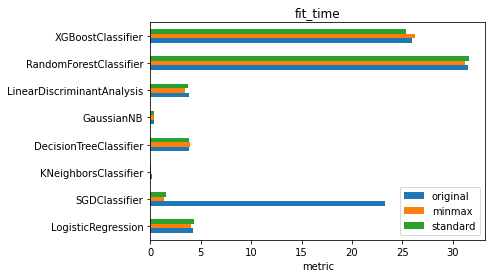

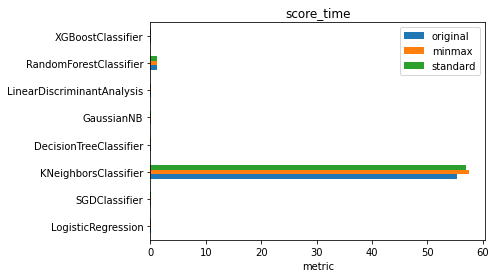

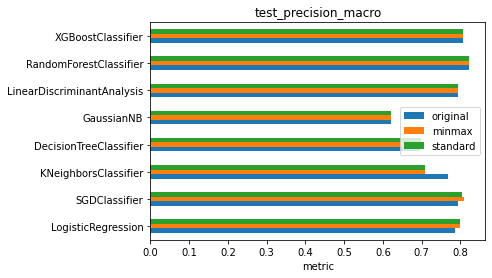

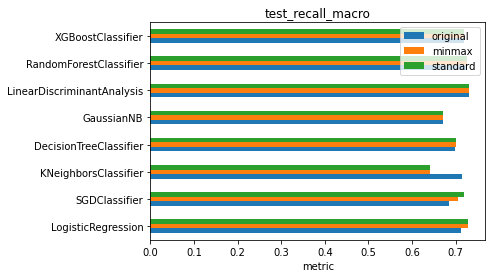

In [ ]:
for i, metric in enumerate(metrics):
    pd.DataFrame(
        np.array([data[0, :, i], data[1, :, i], data[2, :, i]]).transpose(),
        columns=['original', 'minmax', 'standard'],
        index=classifiers.keys()).plot.barh()
    plt.title(metric)
    plt.xlabel('metric')